             datetime  temperature  humidity  wind_speed  solar_radiation
0 2024-06-01 00:00:00           20        85           5                0
1 2024-06-01 01:00:00           19        87           4                0
2 2024-06-01 02:00:00           18        90           3                0
3 2024-06-01 03:00:00           18        92           3                0
4 2024-06-01 04:00:00           17        94           2                0
                  datetime  temperature   humidity  wind_speed  \
count                   11    11.000000  11.000000   11.000000   
mean   2024-06-01 05:00:00    20.272727  88.000000    3.181818   
min    2024-06-01 00:00:00    17.000000  75.000000    2.000000   
25%    2024-06-01 02:30:00    18.000000  85.000000    2.000000   
50%    2024-06-01 05:00:00    19.000000  90.000000    3.000000   
75%    2024-06-01 07:30:00    21.500000  93.000000    4.000000   
max    2024-06-01 10:00:00    28.000000  95.000000    5.000000   
std                    NaN  

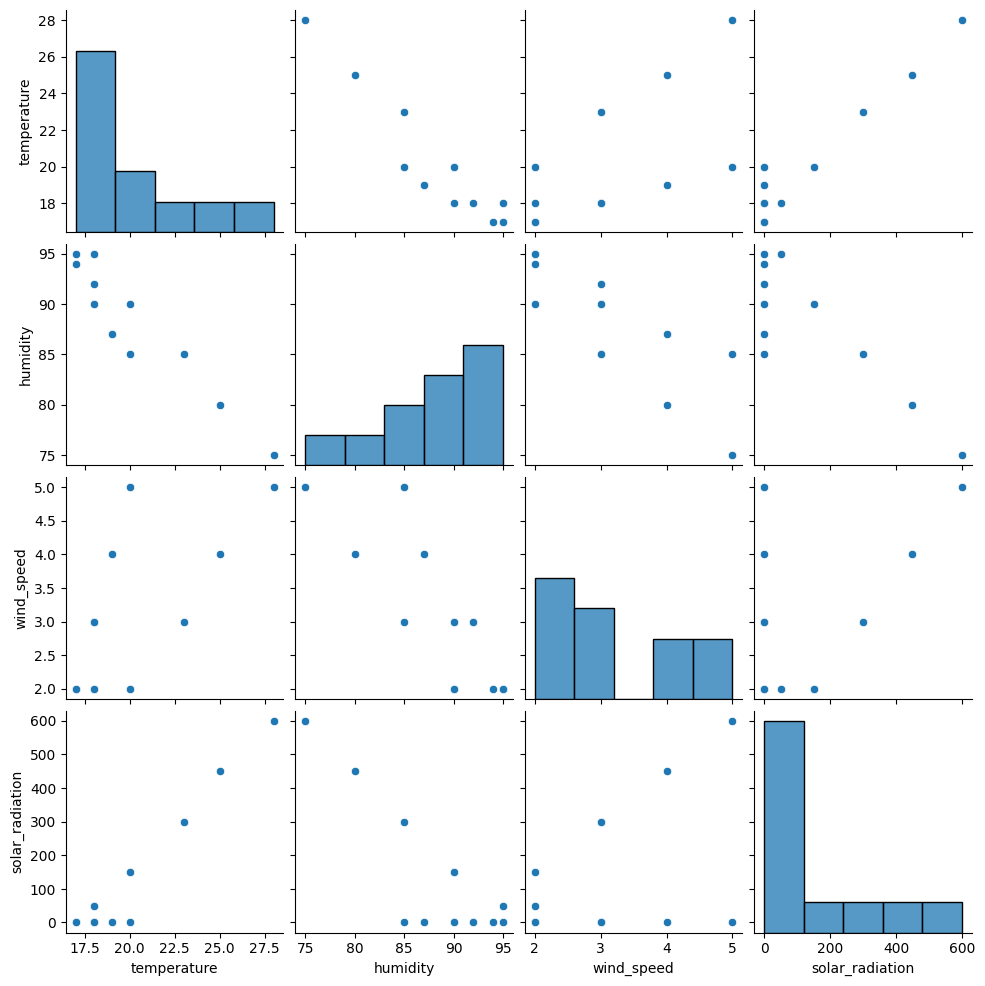

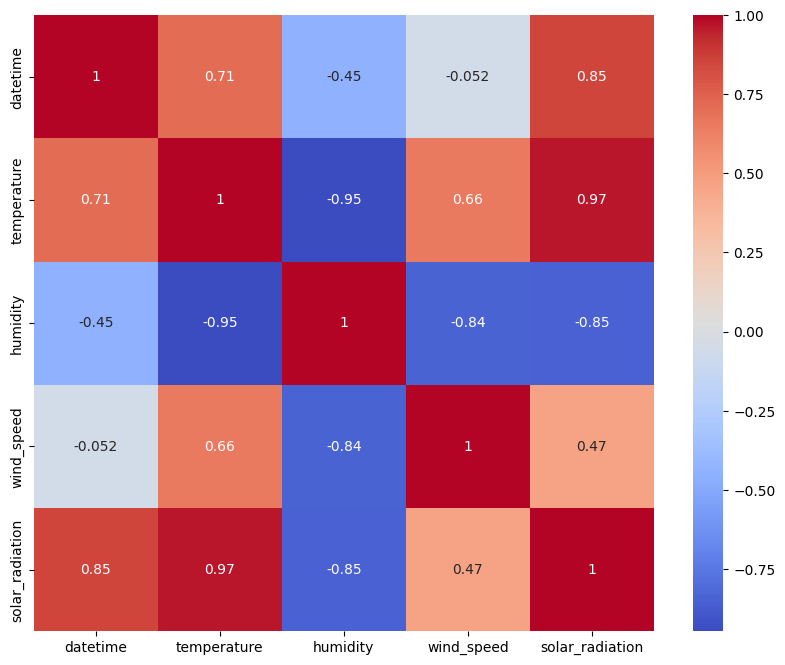

Mean Squared Error: 1722.2335555229165
R^2 Score: 0.9617281432106018


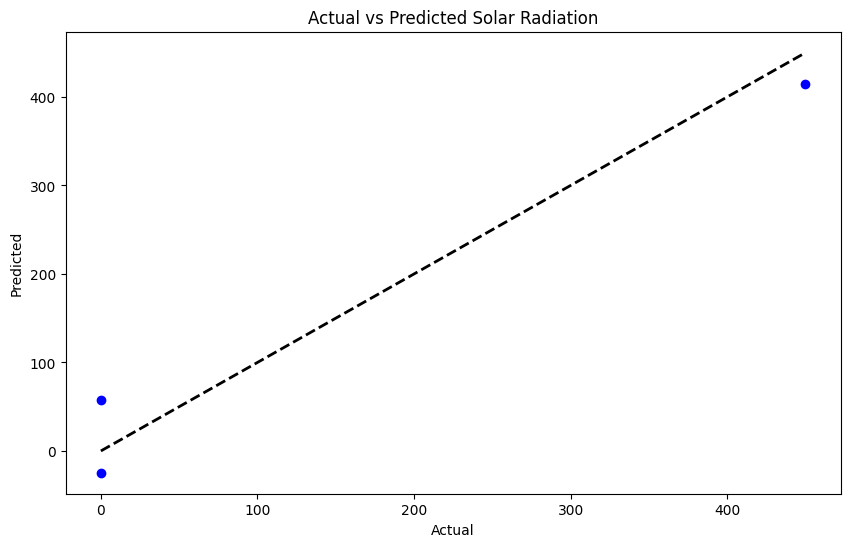

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('solar_radiation_data.csv', parse_dates=['datetime'])

# Explore the data
print(data.head())
print(data.describe())
print(data.info())

# Visualize the data
sns.pairplot(data)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

# Preprocess the data
# Drop rows with missing values (if any)
data.dropna(inplace=True)

# Features and target variable
X = data[['temperature', 'humidity', 'wind_speed']]
y = data['solar_radiation']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target variable
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Solar Radiation')
plt.show()
